In [4]:
import pandas as pd

In [5]:
# load the dataset
data = pd.read_csv('~/Documents/Raporty/Medium/Tesco_Stalowa_closed/tesco_users_data.csv', 
                   index_col='user_id')
data.head()

,Y,brands_visited,visits_n_beforeBiedronka,visits_n_beforeCarrefour,visits_n_beforeKaufland,visits_n_beforeLidl,visits_pct_beforeBiedronka,visits_pct_beforeCarrefour,visits_pct_beforeKaufland,visits_pct_beforeLidl,...,time_minBiedronka,time_minCarrefour,time_minKaufland,time_minLidl,time_minTesco,n_locationsBiedronka,n_locationsCarrefour,n_locationsKaufland,n_locationsLidl,n_locationsTesco
user_id,,,,,,,,,,,,,,,,,,,,,
502308,Lidl,4.0,3,0,0,16,0.150000,0.000000,0.000000,0.8,...,747.0,0.0,0.0,531.0,1019.0,2.0,0.0,0.0,2.0,1.0
511288,Lidl,4.0,1,0,46,0,0.018182,0.000000,0.836364,0.0,...,904.0,0.0,478.0,787.0,778.0,3.0,0.0,1.0,3.0,1.0
513284,Carrefour,2.0,0,10,0,0,0.000000,0.833333,0.000000,0.0,...,0.0,523.0,0.0,0.0,501.0,0.0,1.0,0.0,0.0,1.0
616687,Carrefour,4.0,0,2,2,0,0.000000,0.333333,0.333333,0.0,...,0.0,759.0,781.0,760.0,771.0,0.0,1.0,1.0,1.0,1.0
632801,Carrefour,2.0,0,1,0,0,0.000000,0.500000,0.000000,0.0,...,0.0,1073.0,0.0,0.0,1230.0,0.0,1.0,0.0,0.0,1.0


In [129]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data.iloc[:, 1:], data.Y,
                                                     test_size=0.3,
                                                      random_state=1)


In [130]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(random_state=4)
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_valid)
print( 'Accuracy: {}'.format(accuracy_score(y_valid, forest_preds)))

Accuracy: 0.5420560747663551


In [131]:
from sklearn.model_selection import cross_val_score
forest_cv = cross_val_score(forest, data.iloc[:, 1:], data.Y,
                              cv=7,
                              scoring='accuracy')
print(forest_cv, '\n', forest_cv.mean())

[0.61764706 0.55882353 0.48039216 0.49019608 0.57843137 0.57843137
 0.4950495 ] 
 0.542710153368278


In [134]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_valid)
accuracy_score(y_valid, y_pred)
# gnb.score(y_pred.reshape(-1, 1) ,y_valid)

0.3925233644859813

In [133]:
gbn_cv = cross_val_score(gnb, data.iloc[:, 1:], data.Y,
                              cv=7,
                              scoring='accuracy')
print(gbn_cv, '\n', gbn_cv.mean())

[0.48039216 0.46078431 0.41176471 0.40196078 0.47058824 0.40196078
 0.41584158] 
 0.4347560806500818


The Random Forest Classifier has the highest accuracy, so this is the model I'm developing in the following part

In [135]:
# draw the tree
from sklearn.tree import export_graphviz

export_graphviz(forest[3], out_file='tree1.dot', 
                feature_names = X_train.columns.values,
                class_names = list(y_train.unique()),
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [149]:
feature_importances = pd.DataFrame(forest[2].feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)
feature_importances

,importance
n_locationsLidl,0.188638
n_locationsBiedronka,0.141460
visits_pct_beforeBiedronka,0.112307
visits_pct_beforeLidl,0.102604
visits_n_beforeCarrefour,0.091871
visits_pct_beforeCarrefour,0.071804
visits_n_beforeBiedronka,0.064475
n_locationsKaufland,0.055419
visits_n_beforeLidl,0.049159
visits_n_beforeKaufland,0.036902


In [150]:
for i in range(1,20):
    forest_cv = cross_val_score(forest, data.loc[:, feature_importances.index[:i]], data.Y,
                              cv=7,
                              scoring='accuracy')
    print(i, forest_cv.mean() )

1 0.4459744293757107
2 0.5553845300496436
3 0.5217017500069334
4 0.5062539867432122
5 0.49504950495049505
6 0.4754139279474166
7 0.4810161688437752
8 0.5160024405801925
9 0.5104695343483928
10 0.5216601492081981
11 0.5469118340405469
12 0.5538869012951716
13 0.5819951743073466
14 0.56939013229054
15 0.56939013229054
16 0.56939013229054
17 0.56939013229054
18 0.56939013229054
19 0.56939013229054


In [151]:
forest_cv = cross_val_score(forest, data.loc[:, feature_importances.index[:13]], data.Y,
                              cv=7,
                              scoring='accuracy')
print(forest_cv, '\n', forest_cv.mean())

[0.6372549  0.56862745 0.57843137 0.55882353 0.60784314 0.57843137
 0.54455446] 
 0.5819951743073466


In [152]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100], 
              'max_depth': [2,3,4,5],
              'min_samples_leaf': [1, 10],
              'max_features': ['auto'], 
              'criterion': [ 'gini'],
              'bootstrap': [True, False]
             }

grid_obj = GridSearchCV(forest, parameters, scoring=make_scorer(accuracy_score))
grid_obj = grid_obj.fit( X_train.loc[:, feature_importances.index[:13]], y_train)
best_rf = grid_obj.best_estimator_
print(best_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)


In [153]:
best_rf.fit( X_train.loc[:, feature_importances.index[:13]], y_train)
best_rf_y_pred = best_rf.predict(X_valid.loc[:, feature_importances.index[:13]])
accuracy_score( y_valid, best_rf_y_pred)

0.5233644859813084

In [162]:
forest2 = RandomForestClassifier(random_state=4, bootstrap=False, max_depth=3)
forest2.fit( X_train.loc[:, feature_importances.index[:13]], y_train)
forest_preds2 = forest2.predict(X_valid.loc[:, feature_importances.index[:13]])
print( 'Accuracy: {}'.format(accuracy_score(y_valid, forest_preds2)))

Accuracy: 0.5280373831775701


In [164]:
# rysuj drzewo
export_graphviz(forest2[0], out_file='tree2.dot', 
                feature_names = feature_importances.index[:13],
                class_names = ['Biedronka', 'Carrefour', 'Kaufland', 'Lidl'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)



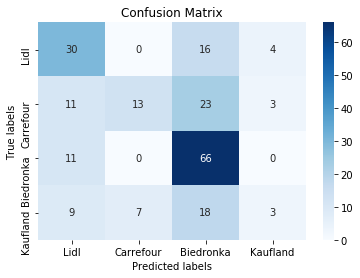

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_valid, best_rf_y_pred, labels=data.Y.unique())
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(data.Y.unique()); ax.yaxis.set_ticklabels(data.Y.unique());

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, best_rf_y_pred))

              precision    recall  f1-score   support

   Biedronka       0.58      0.87      0.69        77
   Carrefour       0.67      0.20      0.31        50
    Kaufland       0.80      0.22      0.34        37
        Lidl       0.49      0.72      0.59        50

    accuracy                           0.57       214
   macro avg       0.63      0.50      0.48       214
weighted avg       0.62      0.57      0.52       214

